<a href="https://colab.research.google.com/github/sarmi2325/Supervised_Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/co2-emission-by-vehicles


In [3]:
import pandas as pd

df=pd.read_csv(f'{path}/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


slope : -7.341928995382881 
 y_intercept : 452.3530363535473
Mse : 604.4725834796035
 RMSE : 24.586024149496062
 MAE : 16.207307806406657
 R2 Score : 0.8234224657110064


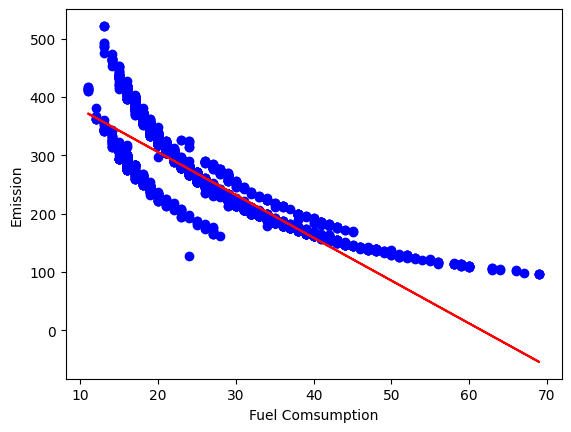

In [4]:
# single linear regression using numpy
import numpy as np
import matplotlib.pyplot as plt


X = df['Fuel Consumption Comb (mpg)']
y = df['CO2 Emissions(g/km)']

x_mean =X.mean()
y_mean =y.mean()
#finding the coefficients
# m = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)^2) -->slope
num = sum((X-x_mean)*(y-y_mean))
den = sum((X-x_mean)**2)
m=num/den

# c --> y_intercept
#c = y_mean-m*x_mean
c = y_mean-m*x_mean

print(f"slope : {m} \n y_intercept : {c}")

y_pred = m * X + c

#visualization
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,'-r')
plt.xlabel('Fuel Comsumption')
plt.ylabel('Emission')

#Evaluation metrics
mse = np.mean((y-y_pred)**2)
rmse = np.sqrt(np.mean((y-y_pred)**2))
mae = np.mean(np.abs(y-y_pred))

ss_res = np.sum((y-y_pred)**2)
ss_tot = np.sum((y-np.mean(y))**2)
r2_score = 1 - (ss_res/ss_tot)

print(f"Mse : {mse}\n RMSE : {rmse}\n MAE : {mae}\n R2 Score : {r2_score}")



slope : [-7.38336409]
 y_intercept : 453.5321856022516


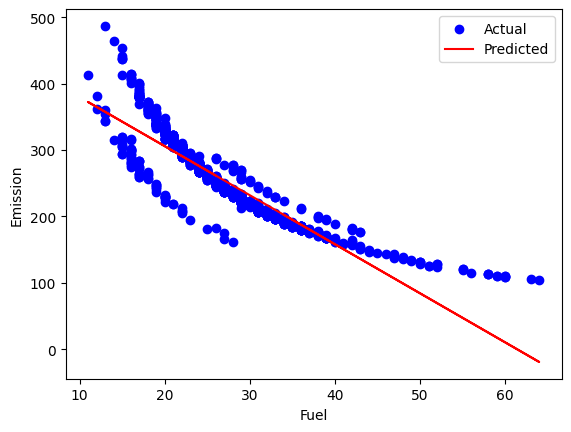

MSE : 629.4127300202433
 RMSE : 25.088099370423485
 MAE : 16.66838106485453
 R2 Score : 0.8170113636841114


In [5]:
# single linear regression using scikit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
# Reshape X_train and X_test to be 2D arrays
# ml model will only accepts 2D arrays with (samples,features)
model.fit(X_train.values.reshape(-1, 1),y_train)

y_pre = model.predict(X_test.values.reshape(-1, 1))

print(f"slope : {model.coef_}\n y_intercept : {model.intercept_}")

#visualization
plt.scatter(X_test,y_test,color='blue', label='Actual')
plt.plot(X_test,y_pre,'-r', label='Predicted')
plt.xlabel('Fuel')
plt.ylabel('Emission')
plt.legend()
plt.show()

#evaluation metrics
print(f"MSE : {mean_squared_error(y_test,y_pre)}\n RMSE : {root_mean_squared_error(y_test,y_pre)}\n MAE : {mean_absolute_error(y_test,y_pre)}\n R2 Score : {r2_score(y_test,y_pre)}")

In [7]:
#using multiple linear regression
#first removing categorical values

df_1 = df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
display(df_1.sample(5))

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6773,1.4,4,9.3,6.5,8.0,35,187
1127,4.2,8,17.3,10.4,14.2,20,327
602,3.3,6,12.7,8.8,10.9,26,251
6916,1.5,4,8.0,6.2,7.2,39,167
871,3.4,6,11.8,8.5,10.3,27,237


In [8]:
#check the correlations
df_1.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [20]:
#lets use Engine_size and Fuel Consumption Comb (mpg) as it has less correlation with other features and highly correlated to target

X1 = df[['Engine Size(L)','Fuel Consumption Comb (mpg)']]
y1 = df[['CO2 Emissions(g/km)']]

#singularity -> checking if the X1 is invertable
singular = np.linalg.det(X1.T @ X1)
print("Invertable" if singular!=0 else "Not Invertable")

#add ones for bias
x_b = np.c_[np.ones((X1.shape[0],1)),X1]

#normal equation
theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y1.values

print(f"Intercept : {theta[0]}\n Coefficients : {theta[1:]}")

Invertable
Intercept : [335.21515775]
 Coeeficients : [[16.59190674]
 [-4.9874006 ]]


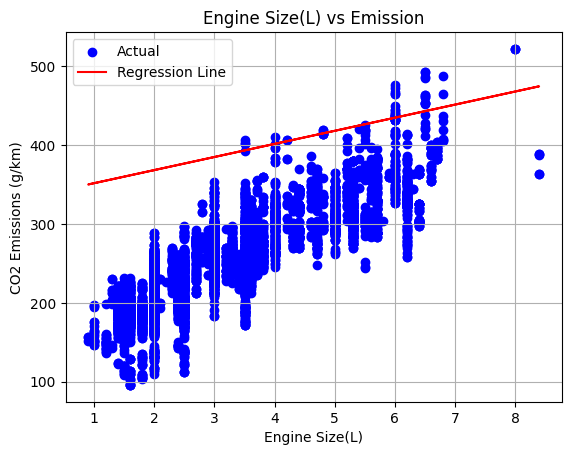

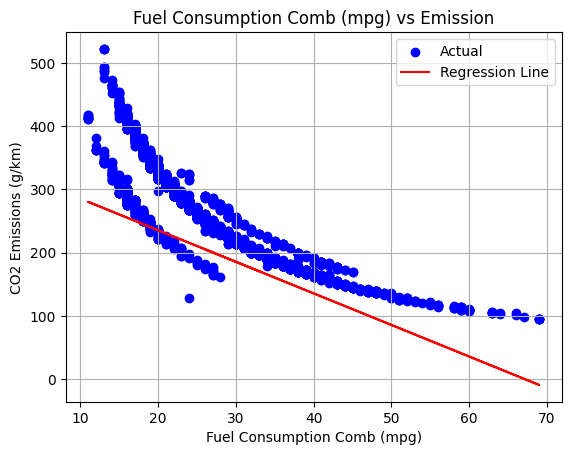

In [22]:
#visualization
# Feature names
features = ['Engine Size(L)', 'Fuel Consumption Comb (mpg)']

for i in range(2):
    plt.figure()
    # Access columns using column names instead of integer indexing
    plt.scatter(X1[features[i]], y1, color='blue', label='Actual')
    # Calculate y_line using the selected column and the corresponding coefficient
    y_line = X1[features[i]] * theta[i+1] + theta[0]
    plt.plot(X1[features[i]], y_line, color='red', label='Regression Line')
    plt.xlabel(features[i])
    plt.ylabel('CO2 Emissions (g/km)')
    plt.title(f'{features[i]} vs Emission')
    plt.legend()
    plt.grid(True)
    plt.show()

    #engine size, the best fit line is not correctly fitted with coeff and intercept
    #fuel consumption is in non-linear relationship with emission

Coefficients : [[16.41375646 -5.02854297]]
 Intercept : [336.96611032]


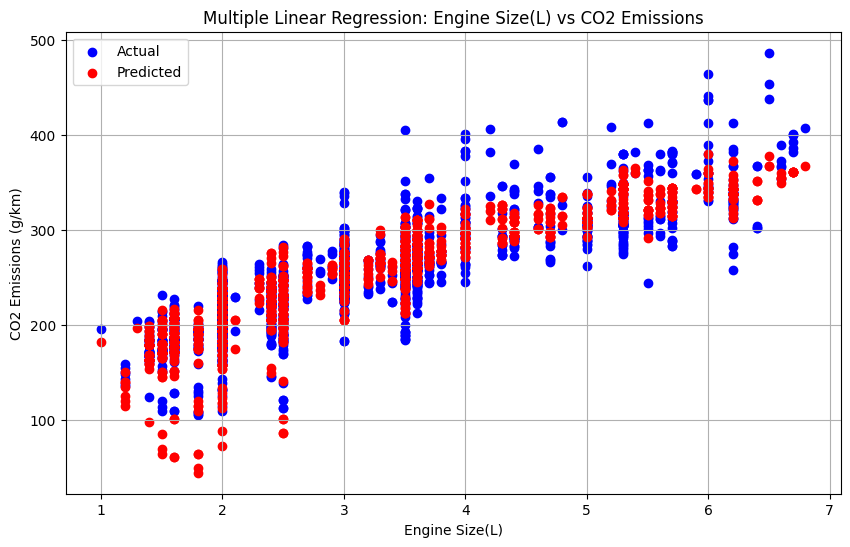

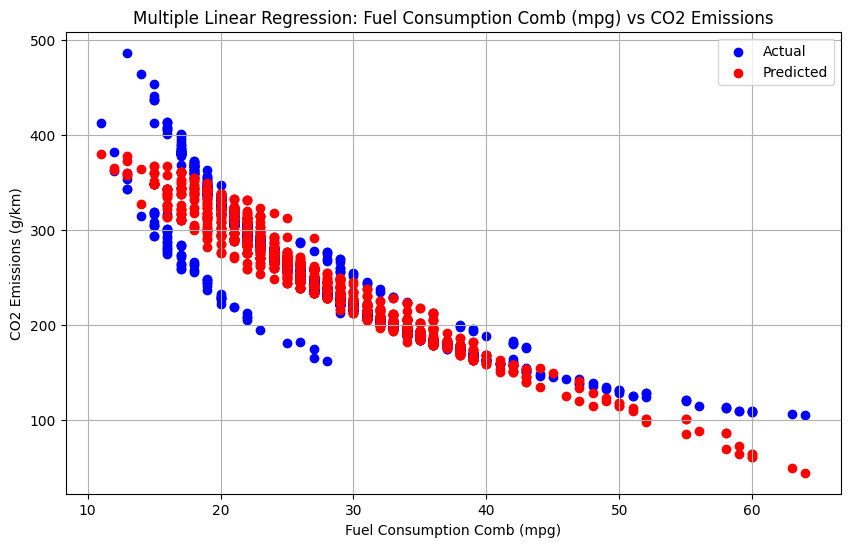

MSE : 398.6451164711625
 RMSE : 19.96609918013938
 MAE : 13.20845745425297
 R2 Score : 0.8841022388684442


In [26]:
#multiple linear regression with scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
import matplotlib.pyplot as plt


X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

model = LinearRegression()
# X1_train and X1_test are already 2D arrays with shape (samples, features), so no reshaping is needed
model.fit(X1_train,y1_train)

y_pre = model.predict(X1_test)

print(f"Coefficients : {model.coef_}\n Intercept : {model.intercept_}")

#visualization (plotting the first feature 'Engine Size(L)' vs Actual and Predicted CO2 Emissions)
plt.figure(figsize=(10, 6))
plt.scatter(X1_test['Engine Size(L)'], y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Engine Size(L)'], y_pre, color='red', label='Predicted')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Multiple Linear Regression: Engine Size(L) vs CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

# You can also visualize the second feature 'Fuel Consumption Comb (mpg)' similarly
plt.figure(figsize=(10, 6))
plt.scatter(X1_test['Fuel Consumption Comb (mpg)'], y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Fuel Consumption Comb (mpg)'], y_pre, color='red', label='Predicted')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Multiple Linear Regression: Fuel Consumption Comb (mpg) vs CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


#evaluation metrics
print(f"MSE : {mean_squared_error(y1_test,y_pre)}\n RMSE : {root_mean_squared_error(y1_test,y_pre)}\n MAE : {mean_absolute_error(y1_test,y_pre)}\n R2 Score : {r2_score(y1_test,y_pre)}")

In [32]:
# using polynomial regression with numpy
degree=3

#normalize using zero mean and unit variance

x1 = df['Engine Size(L)'].values
x2 = df['Fuel Consumption Comb (mpg)'].values

# 2. Normalize or standardize (zero mean, unit variance)
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)

x_poly = np.column_stack([
    np.ones_like(x1),
    x1, x2,
    x1**2, x1*x2, x2**2,
    x1**3, x2**3
])

thet = np.linalg.inv(x_poly.T @ x_poly) @ x_poly.T @ y1

print(f"theta : {thet}")

y_p = x_poly @ thet

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

theta :    CO2 Emissions(g/km)
0           246.347177
1             6.983246
2           -50.457218
3            -9.612720
4           -21.850285
5            -6.159523
6             2.501085
7             1.460862
MSE  : 604.47
RMSE : 24.59
R²   : 0.8234


In [36]:
#polynomial using scikit learn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),                # Feature scaling
    PolynomialFeatures(degree=degree, include_bias=True),  # b,x, x², x³, x1*x2 etc.
    LinearRegression()
)
model.fit(X1, y1)
y_pred = model.predict(X1)

mse = mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")



MSE  : 293.16
RMSE : 17.12
R²   : 0.9144
